In [52]:
import requests
import pandas as pd

## Endpoints

In [53]:
LEAGUE_ID = 85647
PAGE_ID = 1
GW = 10
PLAYER_ID = 18103
PAGE_COUNT = 1

gw_url = "https://fantasy.premierleague.com/api/event/{}/live/"  # stands for gameweek
fixture_url = "https://fantasy.premierleague.com/api/fixtures/"  # FIXTURE_ID
transfer_url = "https://fantasy.premierleague.com/api/entry/{}/transfers/"  # player_id
history_url = (
    "https://fantasy.premierleague.com/api/entry/{}/history/"  # {} = PLAYER_ID
)
h2h_league = (
    "https://fantasy.premierleague.com/api/leagues-h2h-matches/league/{}/"  # LEAGUE_ID
)

# You can access members of your leagues with this code
league_url = "https://fantasy.premierleague.com/api/leagues-classic/{}/standings/?page_standings={}"
# ?page_new_entries=1&page_standings={page_id}&phase=2"

# with the main api, You can access players, teams, fixtures, phases of the game. Use json.keys() to Dictionary of elements
FPL_url = "https://fantasy.premierleague.com/api/bootstrap-static/"

# Access Entry picks with the team_id
fpl_player = "https://fantasy.premierleague.com/api/entry/{}/event/{}/picks/"  # corresponds to player_id and gameweek

In [54]:
pd.set_option("display.max_columns", 80)

In [55]:
home = requests.get(FPL_url)
home = home.json()
print(home.keys())

dict_keys(['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types'])


In [56]:
home["elements"][0]

{'chance_of_playing_next_round': 0,
 'chance_of_playing_this_round': 0,
 'code': 438098,
 'cost_change_event': 0,
 'cost_change_event_fall': 0,
 'cost_change_start': -1,
 'cost_change_start_fall': 1,
 'dreamteam_count': 0,
 'element_type': 3,
 'ep_next': '0.0',
 'ep_this': '0.0',
 'event_points': 0,
 'first_name': 'Fábio',
 'form': '0.0',
 'id': 1,
 'in_dreamteam': False,
 'news': 'Has joined Portuguese side FC Porto on loan for the 2024/25 season',
 'news_added': '2024-08-29T11:06:25.241953Z',
 'now_cost': 54,
 'photo': '438098.jpg',
 'points_per_game': '0.0',
 'second_name': 'Ferreira Vieira',
 'selected_by_percent': '0.0',
 'special': False,
 'squad_number': None,
 'status': 'u',
 'team': 1,
 'team_code': 3,
 'total_points': 0,
 'transfers_in': 439,
 'transfers_in_event': 0,
 'transfers_out': 2719,
 'transfers_out_event': 6,
 'value_form': '0.0',
 'value_season': '0.0',
 'web_name': 'Fábio Vieira',
 'region': None,
 'minutes': 0,
 'goals_scored': 0,
 'assists': 0,
 'clean_sheets': 0

In [57]:
team_code_to_name = {item["code"]: item["name"] for item in home["teams"]}
team_id_to_name = {item["id"]: item["name"] for item in home["teams"]}
pos_code_to_pos = {item["id"]: item["singular_name"] for item in home["element_types"]}

pos_code_to_pos

{1: 'Goalkeeper', 2: 'Defender', 3: 'Midfielder', 4: 'Forward'}

In [58]:
epl_player_info = [
    (
        item["id"],
        pos_code_to_pos[item["element_type"]],
        team_code_to_name[item["team_code"]],
        item["first_name"] + " " + item["second_name"],
    )
    for item in home["elements"]
]

player_df = pd.DataFrame(
    epl_player_info, columns=["player_id", "position", "team", "player_name"]
)
player_df

,player_id,position,team,player_name
0,1,Midfielder,Arsenal,Fábio Ferreira Vieira
1,2,Forward,Arsenal,Gabriel Fernando de Jesus
2,3,Defender,Arsenal,Gabriel dos Santos Magalhães
3,4,Forward,Arsenal,Kai Havertz
4,5,Goalkeeper,Arsenal,Karl Hein
5,6,Defender,Arsenal,Jurriën Timber
6,7,Midfielder,Arsenal,Jorge Luiz Frello Filho
7,8,Defender,Arsenal,Jakub Kiwior
8,9,Midfielder,Arsenal,Gabriel Martinelli Silva
9,12,Midfielder,Arsenal,Ethan Nwaneri


GAMEWEEK URL

In [59]:
mapping = player_df[["player_id", "team", "position"]].to_dict("list")

player_team_mapping = {i: j for i, j in zip(mapping["player_id"], mapping["team"])}
player_position_mapping = {
    i: j for i, j in zip(mapping["player_id"], mapping["position"])
}

In [60]:
gw_url = "https://fantasy.premierleague.com/api/event/{}/live/"  # stands for gameweek

In [61]:
dfs = []
for i in range(1, 10):
    home = requests.get(gw_url.format(i))
    home = home.json()
    temp_df = pd.DataFrame(home["elements"])

    # manual way
    # interest_keys = list(temp_df['stats'][1].keys())
    # for key in interest_keys:
    #     temp_df[key] = temp_df['stats'].map(lambda x:x[key])

    # better way
    stats_df = pd.json_normalize(temp_df["stats"])
    stats_df["gameweek"] = i
    temp_df["fixtures"] = temp_df["explain"].map(lambda x: x[0]["fixture"])
    temp_df.drop(["stats", "explain"], axis=1, inplace=True)

    dfs.append(pd.concat([temp_df, stats_df], axis=1))
    dfs

In [62]:
full_df = pd.concat(dfs, axis=0)
full_df["team"] = full_df["id"].map(lambda x: player_team_mapping[x])
full_df["position"] = full_df["id"].map(lambda x: player_position_mapping[x])

In [63]:
full_df.head(10)

,id,fixtures,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,starts,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,total_points,in_dreamteam,gameweek,team,position
0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.00,0.00,0.00,0.00,0,False,1,Arsenal,Midfielder
1,2,2,5,0,0,0,0,0,0,0,1,0,0,0,1,0.2,0.8,0.0,0.1,0,0.00,0.00,0.00,0.15,0,False,1,Arsenal,Forward
2,3,2,90,0,0,1,0,0,0,0,0,0,0,0,22,13.8,1.4,8.0,2.3,1,0.12,0.02,0.14,0.47,6,False,1,Arsenal,Defender
3,4,2,90,1,1,1,0,0,0,0,0,0,0,3,48,54.8,24.1,46.0,12.5,1,0.45,0.04,0.49,0.47,12,True,1,Arsenal,Forward
4,5,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.00,0.00,0.00,0.00,0,False,1,Arsenal,Goalkeeper
5,6,2,21,0,0,0,0,0,0,0,0,0,0,0,2,0.0,0.8,8.0,0.8,0,0.02,0.01,0.03,0.15,1,False,1,Arsenal,Defender
6,7,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.00,0.00,0.00,0.00,0,False,1,Arsenal,Midfielder
7,8,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.00,0.00,0.00,0.00,0,False,1,Arsenal,Defender
8,9,2,90,0,0,1,0,0,0,0,0,0,0,0,16,13.6,36.7,25.0,7.5,1,0.08,0.19,0.27,0.47,3,False,1,Arsenal,Midfielder
9,10,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.00,0.00,0.00,0.00,0,False,1,Fulham,Midfielder


In [64]:
full_df["fixtures"].unique()

array([ 2,  1,  7,  5,  6, 10,  8,  3,  9,  4, 11, 15, 18, 12, 19, 16, 13,
       20, 14, 17, 21, 25, 23, 22, 29, 26, 24, 28, 27, 30, 39, 35, 34, 38,
       36, 31, 32, 37, 33, 40, 47, 44, 43, 48, 42, 41, 46, 49, 45, 50, 51,
       59, 55, 52, 56, 57, 53, 54, 60, 58, 61, 69, 66, 65, 62, 68, 64, 63,
       67, 70, 71, 72, 77, 78, 79, 75, 76, 74, 73, 80, 81, 87, 86, 89, 88,
       82, 83, 84, 85, 90])

In [65]:
fix = requests.get(fixture_url)
fix = fix.json()
fixture_df = pd.DataFrame(fix)

fixture_df = fixture_df.rename(
    {
        "event": "gameweek",
        "team_h_difficulty": "homedifficulty",
        "team_a_difficulty": "awaydifficulty",
        "team_h": "home",
        "team_a": "away",
        "team_h_score": "homegoals",
        "team_a_score": "awaygoals",
        "kickoff_time": "date",
    },
    axis=1,
)
# pd.set_option()
fixture_df = fixture_df[
    [
        "homedifficulty",
        "awaydifficulty",
        "home",
        "away",
        "homegoals",
        "awaygoals",
        "code",
        "gameweek",
        "finished",
        "date",
    ]
]

fixture_df["home"] = fixture_df["home"].map(lambda x: team_id_to_name[x])
fixture_df["away"] = fixture_df["away"].map(
    lambda x: team_id_to_name[x]
)  # different from full_df

fixture_df["code"] = (
    fixture_df["code"].astype(int).map(lambda x: x - 2444470)
)  # to match full_df
fixture_df.rename({"code": "fixtures"}, axis=1, inplace=True)

fixture_df.head(10)

,homedifficulty,awaydifficulty,home,away,homegoals,awaygoals,fixtures,gameweek,finished,date
0,2,3,Man Utd,Fulham,1.0,0.0,0,1,True,2024-08-16T19:00:00Z
1,5,2,Ipswich,Liverpool,0.0,2.0,3,1,True,2024-08-17T11:30:00Z
2,2,5,Arsenal,Wolves,2.0,0.0,1,1,True,2024-08-17T14:00:00Z
3,2,2,Everton,Brighton,0.0,3.0,2,1,True,2024-08-17T14:00:00Z
4,2,4,Newcastle,Southampton,1.0,0.0,4,1,True,2024-08-17T14:00:00Z
5,2,2,Nott'm Forest,Bournemouth,1.0,1.0,5,1,True,2024-08-17T14:00:00Z
6,3,2,West Ham,Aston Villa,1.0,2.0,6,1,True,2024-08-17T16:30:00Z
7,2,3,Brentford,Crystal Palace,2.0,1.0,7,1,True,2024-08-18T13:00:00Z
8,5,4,Chelsea,Man City,0.0,2.0,8,1,True,2024-08-18T15:30:00Z
9,4,2,Leicester,Spurs,1.0,1.0,9,1,True,2024-08-19T19:00:00Z


In [66]:
fixture_df.columns

Index(['homedifficulty', 'awaydifficulty', 'home', 'away', 'homegoals',
       'awaygoals', 'fixtures', 'gameweek', 'finished', 'date'],
      dtype='object')

In [67]:
fixture_df["homewin"] = fixture_df["homegoals"] > fixture_df["awaygoals"]
fixture_df["draw"] = fixture_df["homegoals"] == fixture_df["awaygoals"]
fixture_df["awaywin"] = fixture_df["homegoals"] < fixture_df["awaygoals"]

fixture_df["homewin"] = fixture_df["homewin"].astype(int)
fixture_df["draw"] = fixture_df["draw"].astype(int)
fixture_df["awaywin"] = fixture_df["awaywin"].astype(int)

fixture_df.head(10)

,homedifficulty,awaydifficulty,home,away,homegoals,awaygoals,fixtures,gameweek,finished,date,homewin,draw,awaywin
0,2,3,Man Utd,Fulham,1.0,0.0,0,1,True,2024-08-16T19:00:00Z,1,0,0
1,5,2,Ipswich,Liverpool,0.0,2.0,3,1,True,2024-08-17T11:30:00Z,0,0,1
2,2,5,Arsenal,Wolves,2.0,0.0,1,1,True,2024-08-17T14:00:00Z,1,0,0
3,2,2,Everton,Brighton,0.0,3.0,2,1,True,2024-08-17T14:00:00Z,0,0,1
4,2,4,Newcastle,Southampton,1.0,0.0,4,1,True,2024-08-17T14:00:00Z,1,0,0
5,2,2,Nott'm Forest,Bournemouth,1.0,1.0,5,1,True,2024-08-17T14:00:00Z,0,1,0
6,3,2,West Ham,Aston Villa,1.0,2.0,6,1,True,2024-08-17T16:30:00Z,0,0,1
7,2,3,Brentford,Crystal Palace,2.0,1.0,7,1,True,2024-08-18T13:00:00Z,1,0,0
8,5,4,Chelsea,Man City,0.0,2.0,8,1,True,2024-08-18T15:30:00Z,0,0,1
9,4,2,Leicester,Spurs,1.0,1.0,9,1,True,2024-08-19T19:00:00Z,0,1,0


<Axes: xlabel='homedifficulty,awaydifficulty'>

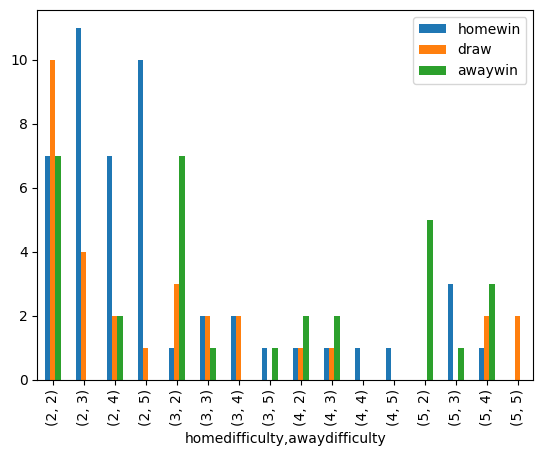

In [68]:
fixture_df.groupby(["homedifficulty", "awaydifficulty"]).aggregate(
    {"homewin": "sum", "draw": "sum", "awaywin": "sum"}
).plot(kind="bar")

In [69]:
full_df.columns

Index(['id', 'fixtures', 'minutes', 'goals_scored', 'assists', 'clean_sheets',
       'goals_conceded', 'own_goals', 'penalties_saved', 'penalties_missed',
       'yellow_cards', 'red_cards', 'saves', 'bonus', 'bps', 'influence',
       'creativity', 'threat', 'ict_index', 'starts', 'expected_goals',
       'expected_assists', 'expected_goal_involvements',
       'expected_goals_conceded', 'total_points', 'in_dreamteam', 'gameweek',
       'team', 'position'],
      dtype='object')

In [ ]:
# exclude = ["expected_goals_conceded"]

columns = [
    "influence",
    "creativity",
    "threat",
    "ict_index",
    "expected_goals",
    "expected_assists",
    "expected_goal_involvements",
    "expected_goals_conceded",
]

other_cols = [
    "goals_scored",
    "assists",
    "clean_sheets",
    "goals_conceded",
    "own_goals",
    "penalties_saved",
    "penalties_missed",
    "yellow_cards",
    "red_cards",
    "saves",
    "bonus",
    "bps",
    "total_points",
]

category = ["team", "position", "gameweek"]

for col in columns:
    full_df[col] = full_df[col].astype(float)

In [71]:
print("Totals")
for i in full_df.columns:
    print(f"{i}:{full_df[i].sum()}")

Totals
id:1923905
fixtures:270998
minutes:177213
goals_scored:254
assists:231
clean_sheets:428
goals_conceded:2871
own_goals:7
penalties_saved:4
penalties_missed:4
yellow_cards:466
red_cards:14
saves:607
bonus:567
bps:30424
influence:41362.0
creativity:29179.300000000003
threat:26704.0
ict_index:9718.699999999999
starts:1980
expected_goals:267.86
expected_assists:179.28
expected_goal_involvements:447.10999999999996
expected_goals_conceded:2911.26
total_points:7201
in_dreamteam:99
gameweek:29767
team:ArsenalArsenalArsenalArsenalArsenalArsenalArsenalArsenalArsenalFulhamCrystal PalaceArsenalArsenalSouthamptonArsenalArsenalArsenalArsenalFulhamArsenalArsenalArsenalArsenalArsenalArsenalNott'm ForestSouthamptonAston VillaAston VillaAston VillaAston VillaAston VillaAston VillaAston VillaAston VillaAston VillaAston VillaAston VillaAston VillaAston VillaAston VillaAston VillaAston VillaAston VillaAston VillaAston VillaAston VillaAston VillaAston VillaAston VillaAston VillaAston VillaAston VillaA

TRY GROUPBYs BY TEAMS, BY POSITIONS

In [72]:
pd.set_option("display.max_rows", None)

In [ ]:
full_df[columns + other_cols + category].groupby(["gameweek", "position"]).aggregate(
    {
        "goals_scored": "sum",
        "total_points": ["sum"],
        "assists": "sum",
        "creativity": ["max"],
        "influence": "max",
        "threat": "max",
    }
)

# .sort_values(by= ("total_points", "max"), ascending=False) i'll likely want to do this in frontend

# .sum()
# .sum() should be count for some columns like cleansheet, goals conceded, should also exclude position
# expected_goals_conceded, goals_conceded,

# aggregate(
# {
#     "goals_scored": "sum",
#     "total_points": ["sum", "max", "mean"],
#     "creativity": ["max"],
# }
# )
# .sort_values(by= ("total_points", "max"), ascending=False)

goals_scored total_points creativity influence threat
                             sum          max        max       max    max
gameweek position                                                        
1        Defender              1            9       59.3      50.0   40.0
         Forward               8           12       24.8      61.4   61.0
         Goalkeeper            0            9        0.0      47.0    0.0
         Midfielder           11           14       83.0      64.2   80.0
2        Defender              2           14       47.1      63.0   54.0
         Forward               8           17       26.8      97.2   83.0
         Goalkeeper            0           10       10.0      54.8    0.0
         Midfielder           22           20       96.3     110.6   88.0
3        Defender              2            7       44.6      58.6   33.0
         Forward              12           17       37.1     106.8   81.0
         Goalkeeper            0            8        0.1      52.0    0.0
         Midfielder           14           17       92.3      82.8   88.0
4        Defender              3           15       62.0      61.0   51.0
         Forward              12           13       24.3      72.2   89.0
         Goalkeeper            0           15       10.0      66.2    0.0
         Midfielder            8           12       73.0      61.0   60.0
5        Defender              4           11       62.2      56.6   99.0
         Forward              12           16       52.7      87.8  114.0
         Goalkeeper            0           10        0.1      63.0    0.0
         Midfielder           14           16       77.0      78.6   90.0
6        Defender              7           12       88.1      83.0   81.0
         Forward               7           12       18.1      68.2  100.0
         Goalkeeper            0            6        0.1      89.6    4.0
         Midfielder           19           25      114.3     149.0   82.0
7        Defender              3           10       52.4      62.8   56.0
         Forward               9           18       56.3      41.2   82.0
         Goalkeeper            0           15        0.0      56.4    0.0
         Midfielder           19           16       90.0      84.2   90.0
8        Defender              4           14       58.1      69.0   35.0
         Forward              10            9       41.7      44.4   79.0
         Goalkeeper            0           11       13.0      63.2    0.0
         Midfielder           13           13       71.6      61.4  101.0
9        Defender              2            9       63.2      54.0   37.0
         Forward              15           13       50.8      66.4   91.0
         Goalkeeper            0            8        0.0      52.0    0.0
         Midfielder           13           15       76.6      76.4   66.0

FUNFACT

- Lowest possible bonus point to be shared per week is 60, every game should have at least 6
- 